In [126]:
!pip install plotly
!pip install numpy
!pip install nbconvert
!pip install pandoc
!pip install Tex






  Created wheel for pandoc: filename=pandoc-2.2-py3-none-any.whl size=29557 sha256=6907b71d2c0eb261b2dd3dec087b0634de8612792b98d7fee9c875539fe80202
  Stored in directory: c:\users\ycanli\appdata\local\pip\cache\wheels\2d\da\b1\54ff0401ef9b07b60c7fc9cffe616f243cf27dc3d04bd5d5ef
Successfully built pandoc
  Created wheel for Tex: filename=tex-1.8-py3-none-any.whl size=5132 sha256=dd507705dfbc3cabaa7cba8dae6fdb47e2d1ca9d84283079e0252d3840207001
  Stored in directory: c:\users\ycanli\appdata\local\pip\cache\wheels\28\89\f2\8455d9d5d4555c9c3f80be3f69a9b5997a9579653064b4182a
Successfully built Tex


In [2]:
import numpy as np
import pandas as pd

In [3]:
fifa=pd.read_csv('players_20.csv')

In [4]:
fifa.head()

,sofifa_id,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,contract_valid_until
0,134956,L. Cana,30,27/07/1983,186,77,Albania,Lazio,77,77,CB,Right,2,2016.0
1,184881,S. Feghouli,24,26/12/1989,177,71,Algeria,Valencia CF,81,88,"RM, RW",Right,2,2016.0
2,184267,Y. Brahimi,24,08/02/1990,175,66,Algeria,FC Porto,77,81,"LW, RW",Right,2,2019.0
3,201454,F. Ghoulam,23,01/02/1991,188,80,Algeria,Napoli,75,81,LB,Left,1,2018.0
4,201143,A. Mandi,22,22/10/1991,184,78,Algeria,Stade de Reims,75,79,"RB, CB",Right,1,2017.0


In [5]:
for col in fifa.columns:
    print(col)

sofifa_id
short_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
player_positions
preferred_foot
international_reputation
contract_valid_until


In [6]:
fifa.shape

(938, 14)

In [7]:
fifa['nationality'].value_counts()[0:10]

Spain          100
France          85
Brazil          80
Germany         75
England         71
Italy           66
Argentina       56
Netherlands     44
Portugal        28
Belgium         23
Name: nationality, dtype: int64

In [ ]:
import csv
import sqlite3
import numpy as np
import codecs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML #display media control overlay of bar chart race 
from tqdm import tqdm #show progress bar during loops
from matplotlib import style 
%matplotlib inline


 
#connecting to the database
db = sqlite3.connect('football.db')
mycursor = db.cursor()

query = '''DROP TABLE IF EXISTS football'''
mycursor.execute(query)

query_table = '''CREATE TABLE football (
    sofifa_Id STRING PRIMARY KEY,
    short_name TEXT NOT NULL,
    age INTEGER,
    dob DATE,
    height_cm INTEGER,
    weight_kg INTEGER,
    nationality TEXT,
    club TEXT,
    overall INTEGER,
    potential INTEGER,
    player_positions TEXT,
    preferred_foot TEXT,
    international_reputation INTEGER,
    contract_valid_until INTEGER
     );'''
mycursor.execute(query_table)


# Import data
file = open('players_20.csv')
contents = csv.reader(file)

insert_records = """INSERT INTO football(sofifa_Id, short_name, age, dob, height_cm, weight_kg, nationality, club, overall, potential, player_positions, preferred_foot, international_reputation, contract_valid_until)  
                VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?,?)"""


mycursor.executemany(insert_records, contents)

In [10]:
select_all = "SELECT * FROM football"
rows = mycursor.execute(select_all).fetchall()

In [11]:
for r in rows:
    print(r)

('ï»¿sofifa_id', 'short_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'player_positions', 'preferred_foot', 'international_reputation', 'contract_valid_until')
(134956, 'L. Cana', 30, '27/07/1983', 186, 77, 'Albania', 'Lazio', 77, 77, 'CB', 'Right', 2, 2016)
(184881, 'S. Feghouli', 24, '26/12/1989', 177, 71, 'Algeria', 'Valencia CF', 81, 88, 'RM, RW', 'Right', 2, 2016)
(184267, 'Y. Brahimi', 24, '08/02/1990', 175, 66, 'Algeria', 'FC Porto', 77, 81, 'LW, RW', 'Right', 2, 2019)
(201454, 'F. Ghoulam', 23, '01/02/1991', 188, 80, 'Algeria', 'Napoli', 75, 81, 'LB', 'Left', 1, 2018)
(201143, 'A. Mandi', 22, '22/10/1991', 184, 78, 'Algeria', 'Stade de Reims', 75, 79, 'RB, CB', 'Right', 1, 2017)
(209473, 'N. Ghilas', 24, '20/04/1990', 183, 85, 'Algeria', 'Cordoba CF', 75, 79, 'ST, RW', 'Right', 1, 2015)
(217699, 'I. Slimani', 26, '18/06/1988', 188, 79, 'Algeria', 'Sporting CP', 75, 78, 'ST', 'Right', 2, 2017)
(158023, 'L. Messi', 27, '24/06/1987',

In [16]:
# QUESTON-1 List of players over 25 years old  with their names, ages and birth of days (bod)
mycursor.execute('''SELECT sofifa_id, short_name, age, dob, club FROM football WHERE age > 25 ''')
all_rows = mycursor.fetchall()
for row in all_rows:
  print(row[0], " : ", row[1], " : ", row[2], row[3], row[4])

ï»¿sofifa_id  :  short_name  :  age dob club
134956  :  L. Cana  :  30 27/07/1983 Lazio
217699  :  I. Slimani  :  26 18/06/1988 Sporting CP
158023  :  L. Messi  :  27 24/06/1987 FC Barcelona
170481  :  E. Garay  :  27 10/10/1986 Zenit St. Petersburg
142754  :  J. Mascherano  :  30 08/06/1984 FC Barcelona
142784  :  P. Zabaleta  :  29 16/01/1985 Manchester City
152999  :  R. Palacio  :  32 05/02/1982 Inter
159065  :  E. Lavezzi  :  29 03/05/1985 Paris Saint-Germain
178562  :  E. Banega  :  26 29/06/1988 Sevilla FC
192366  :  N. Otamendi  :  26 12/02/1988 Valencia CF
179847  :  F. Fazio  :  27 17/03/1987 Tottenham Hotspur
188791  :  A. Costa  :  29 09/01/1985 Spartak Moscow
48745  :  F. Coloccini  :  32 22/01/1982 Newcastle United
134979  :  M. Demichelis  :  33 20/12/1980 Manchester City
139062  :  W. Caballero  :  32 28/09/1981 Manchester City
138123  :  E. Cambiasso  :  33 18/08/1980 Leicester City
142708  :  D. Milito  :  35 12/06/1979 Racing Club
165501  :  N. Pareja  :  30 19/01/19

152567  :  A. Tettey  :  28 04/04/1986 Norwich City
209097  :  O. Cardosa  :  30 26/11/1983 Paraguay
179752  :  O. Cardozo  :  31 20/05/1983 Trabzonspor
209082  :  S. La Cruz  :  33 08/03/1981 Paraguay
25798  :  R. Santa Cruz  :  32 16/08/1981 Mailaga
121193  :  N. Valdez  :  30 28/11/1983 Eintracht Frankfurt
156092  :  J. Villar  :  37 30/06/1977 Colo-Colo
183177  :  L. Barrios  :  29 13/11/1984 Montpellier HSC
209100  :  L. Barrogios  :  30 15/03/1984 Paraguay
25420  :  C. Pizarro  :  35 03/10/1978 FC Bayern Munchen
167305  :  J. Vargas  :  30 05/10/1983 Fiorentina
173771  :  L. Piszczek  :  29 03/06/1985 Borussia Dortmund
190547  :  K. Glik  :  26 03/02/1988 Torino
177922  :  K. Grosicki  :  26 08/06/1988 Stade Rennais FC
105846  :  A. Boruc  :  34 20/02/1980 Southampton
162280  :  A. Mierzejewski  :  27 06/11/1986 Al Nassr
135218  :  D. Perquis  :  30 10/04/1984 Real Betis
138066  :  L. Obraniak  :  29 10/11/1984 SV Werder Bremen
165174  :  E. Polanski  :  28 17/03/1986 TSG 1899 Ho

In [18]:
# QUESTON-2 What is the name of players who are Brazilian citizens and play in England?
mycursor.execute('''SELECT short_name, nationality, club FROM football WHERE nationality='Brazil' and club LIKE 'Man%' ''')
all_rows = mycursor.fetchall()
for row in all_rows:
 print(row[0], " : ", row[1], " : ", row[2])


Fernandinho  :  Brazil  :  Manchester City
Fernando  :  Brazil  :  Manchester City
Rafael  :  Brazil  :  Manchester United


In [19]:
# QUESTON-3 How many left-footed players are Brazilians?
mycursor.execute('''SELECT preferred_foot, COUNT(*), nationality FROM football WHERE nationality='Brazil' and preferred_foot='Left' ''')
all_rows = mycursor.fetchall()
for row in all_rows:
 print(row[0], " : ", row[1], " : ", row[2])

Left  :  18  :  Brazil


In [21]:
# QUESTON-4 What is the overall average of German and Brazilian footballers? 
mycursor.execute(''' SELECT nationality, AVG(overall) AS 'Average' FROM football WHERE nationality='Brazil' GROUP BY nationality ''')
all_rows = mycursor.fetchall()
for row in all_rows:
 print(row[0], " : ", row[1])


Brazil  :  78.375


In [20]:
# QUESTON-5 Which citizens are higher overall?
mycursor.execute('''
SELECT nationality, AVG(overall) AS 'Average' FROM football WHERE nationality=('Germany') GROUP BY nationality
HAVING AVG(overall) <>
(SELECT AVG(overall) AS 'Average' 
    FROM football
    WHERE nationality=('Brazil') 
    GROUP BY nationality); ''')
all_rows = mycursor.fetchall()
for row in all_rows:
 print(row[0], " : ", row[1])

Germany  :  78.44


Netherlands  :  44
Argentina  :  56
Italy  :  66
England  :  71
Germany  :  75
Brazil  :  80
France  :  85
Spain  :  100
Name of Countries =  ['Netherlands', 'Argentina', 'Italy', 'England', 'Germany', 'Brazil', 'France', 'Spain']
Numbers of Players =  [44, 56, 66, 71, 75, 80, 85, 100]


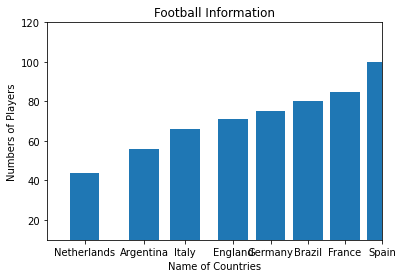

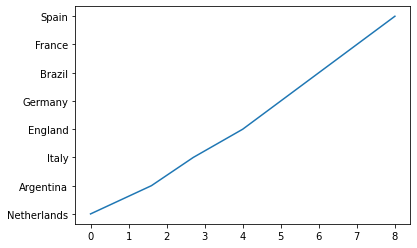

In [123]:
# QUESTION-6 How many of each type of players from different nationalities are playing and more than 30 players in them?
import numpy as np
import matplotlib.pyplot as plt

mycursor = db.cursor()

# Fecthing Data From mysql to my python progame
mycursor.execute(''' SELECT nationality, COUNT(*) FROM football GROUP BY nationality HAVING COUNT(nationality)>30 ORDER BY COUNT(*)''')
all_rows = mycursor.fetchall()

for row in all_rows:
    print(row[0], " : ", row[1])

#result = mycursor.fetchall
 
Names = []
Numbers = []
 
for i in all_rows:
    Names.append(i[0])
    Numbers.append(i[1])
     
print("Name of Countries = ", Names)
print("Numbers of Players = ", Numbers)
 
 
# Visulizing Data using Matplotlib
x_pos = [0, 1.6, 2.7, 4, 5, 6, 7, 8]

# Create bars
plt.bar(x_pos, Numbers)
 
# Create names on the x-axis
plt.xticks(x_pos, Names)

#plt.bar(Names, Numbers)

plt.ylim(10, 120)
plt.xlim(-1, 8)
plt.xlabel("Name of Countries")
plt.ylabel("Numbers of Players")
plt.title("Football Information")
plt.show()

# plot in it's default size
display(plt.plot(x_pos, Names))
  
# changing the size of figure to 2X2
#plt.figure(figsize=(2, 2))
#display(plt.plot(x_pos, Names))








In [48]:
db.commit()